<a href="https://colab.research.google.com/github/bayuaripermana/bayuaripermana/blob/main/mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price--> Classification Problem.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Train Dataset

In [9]:
df=pd.read_csv("/content/drive/MyDrive/DA TUGAS/train.csv")

In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

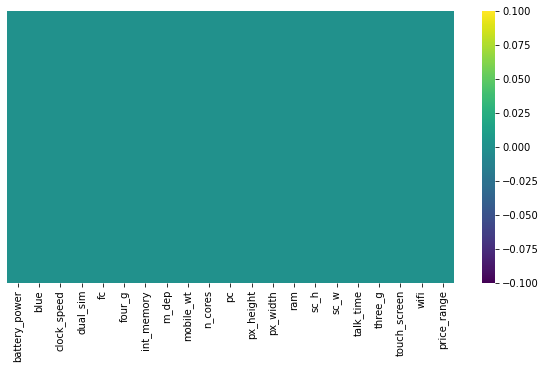

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [14]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
from scipy.stats import skew

battery_power
Skewness: 0.03187454295305568


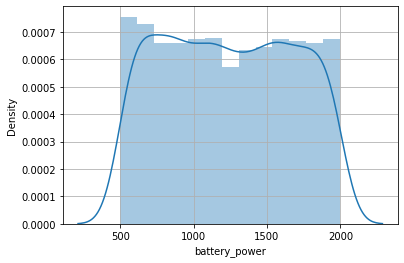

blue
Skewness: 0.02000100007500624


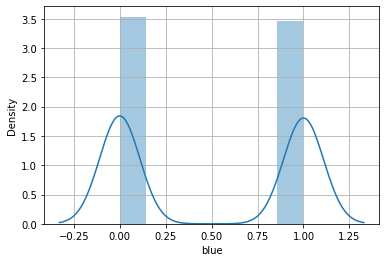

clock_speed
Skewness: 0.17795052935349268


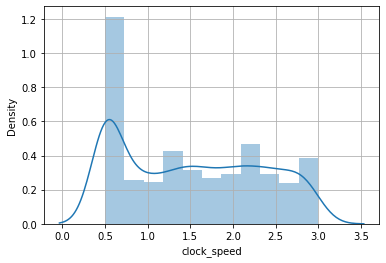

dual_sim
Skewness: -0.03800686085763292


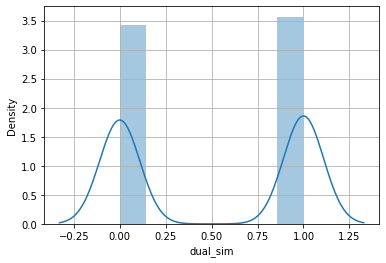

fc
Skewness: 1.0190463925723268


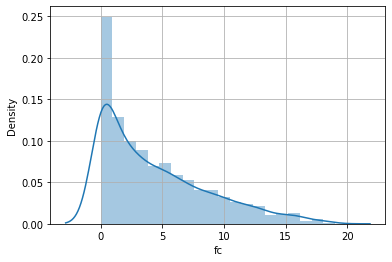

four_g
Skewness: -0.08607961742649396


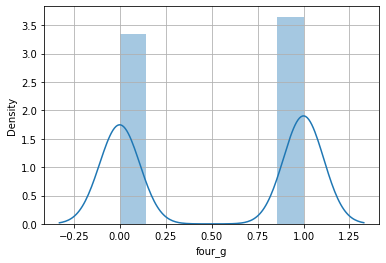

int_memory
Skewness: 0.05784590180779676


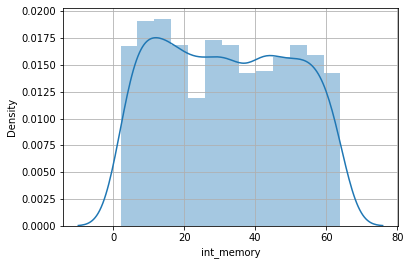

m_dep
Skewness: 0.08901518436117652


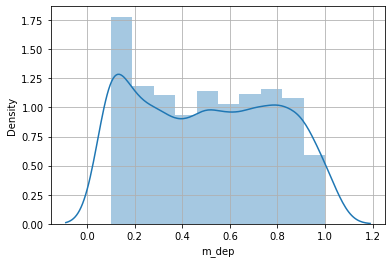

mobile_wt
Skewness: 0.0065532377855500356


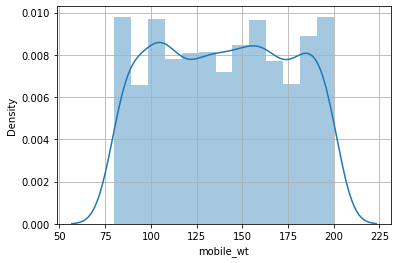

n_cores
Skewness: 0.0036247871155484306


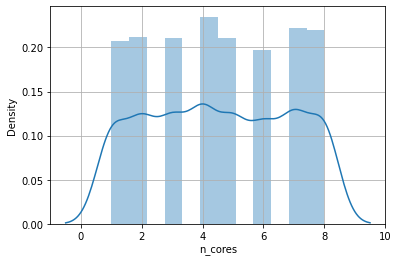

pc
Skewness: 0.017293168153506185


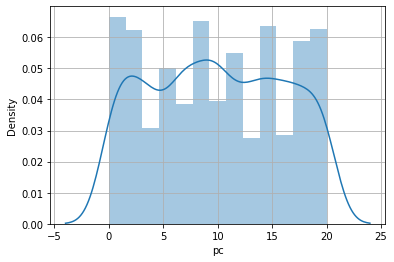

px_height
Skewness: 0.6657714484857727


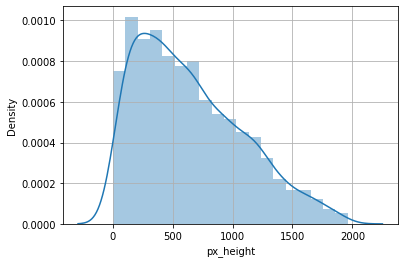

px_width
Skewness: 0.014776380851328284


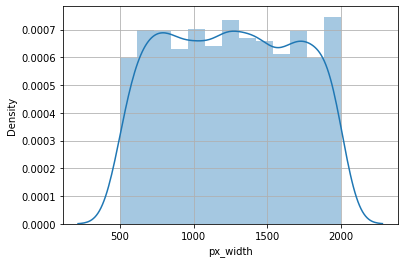

ram
Skewness: 0.006623063336208135


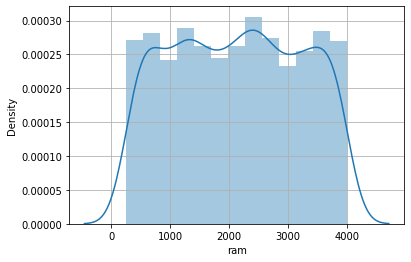

sc_h
Skewness: -0.0988100623460247


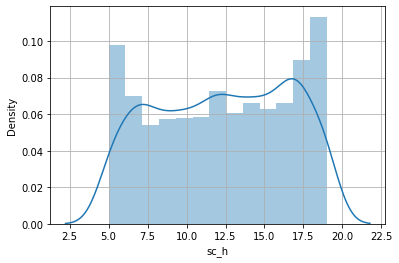

sc_w
Skewness: 0.6333116340766181


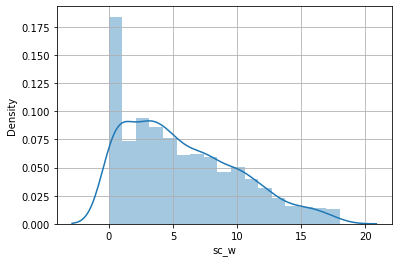

talk_time
Skewness: 0.00950462691314207


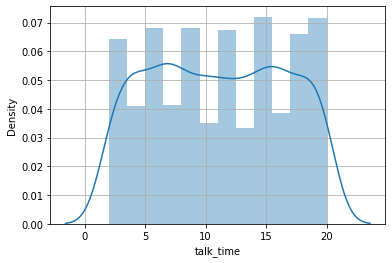

three_g
Skewness: -1.2272203362251917


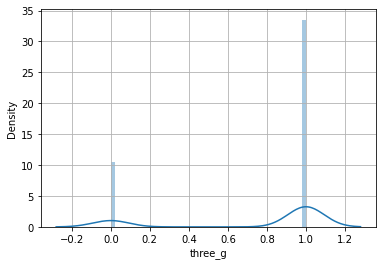

touch_screen
Skewness: -0.01200021600583211


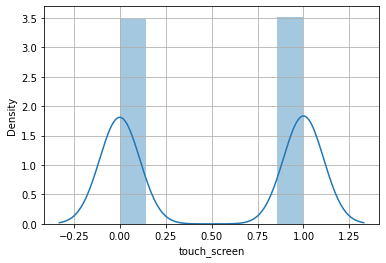

wifi
Skewness: -0.02800274440343397


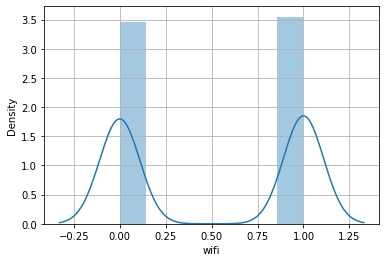

price_range
Skewness: 0.0


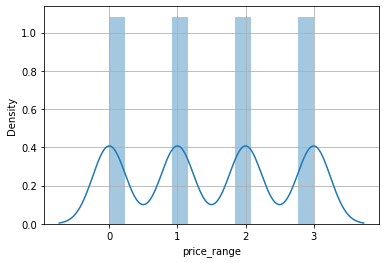

In [16]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [17]:
df.corr()["price_range"].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

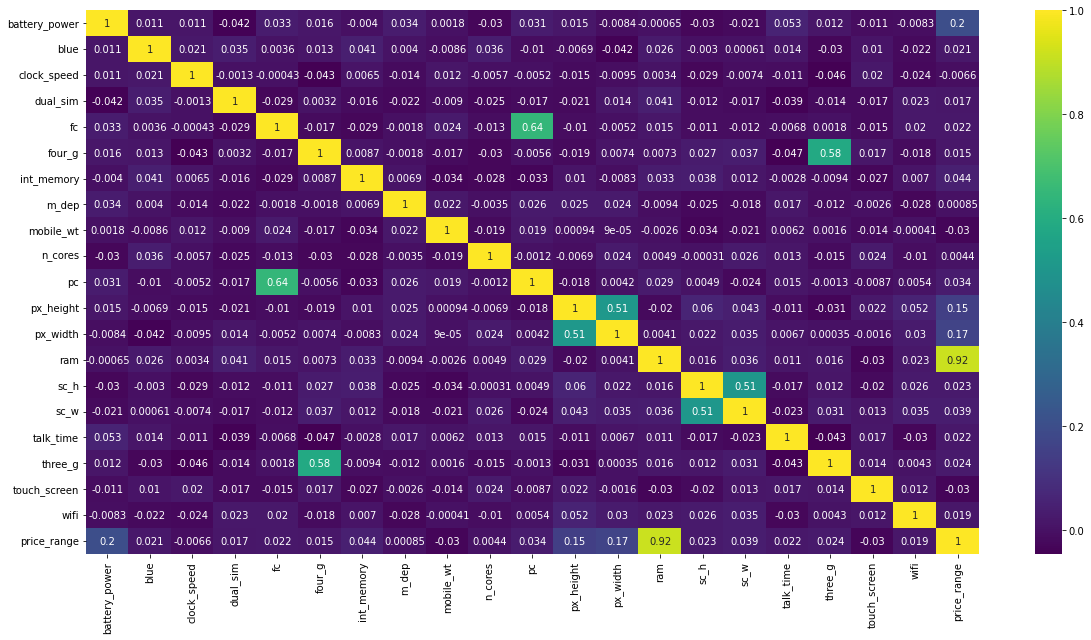

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

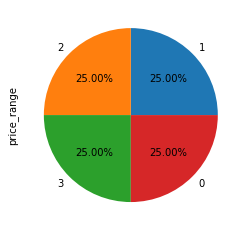

In [19]:
df["price_range"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [20]:
from plotly import express as px
import plotly.graph_objects as go
   
fig = go.Figure(px.box(df,x="price_range",y="ram"))
fig.update_layout(title_x=0.5)
fig.show()

In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [22]:
x=df.iloc[ : , :-1]
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [23]:
y=df.iloc[ : ,-1]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

# KNN-KNeighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.53      0.76      0.63       135
           1       0.32      0.36      0.34       149
           2       0.44      0.37      0.40       168
           3       0.71      0.49      0.58       148

    accuracy                           0.48       600
   macro avg       0.50      0.49      0.49       600
weighted avg       0.50      0.48      0.48       600



In [29]:
accuracy_score(ytest,ypred)

0.48333333333333334

In [30]:
confusion_matrix(ytest,ypred)

array([[102,  30,   3,   0],
       [ 67,  54,  25,   3],
       [ 22,  58,  62,  26],
       [  0,  26,  50,  72]])

#### Hyper-Parameter Tuning

In [31]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [32]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn,hyperparameters,verbose=3)
grid.fit(xtrain,ytrain)

Output streaming akan dipotong hingga 5000 baris terakhir.
[CV 1/5] END .leaf_size=32, n_neighbors=23, p=1;, score=0.725 total time=   0.0s
[CV 2/5] END .leaf_size=32, n_neighbors=23, p=1;, score=0.664 total time=   0.0s
[CV 3/5] END .leaf_size=32, n_neighbors=23, p=1;, score=0.636 total time=   0.0s
[CV 4/5] END .leaf_size=32, n_neighbors=23, p=1;, score=0.671 total time=   0.0s
[CV 5/5] END .leaf_size=32, n_neighbors=23, p=1;, score=0.621 total time=   0.0s
[CV 1/5] END .leaf_size=32, n_neighbors=23, p=2;, score=0.639 total time=   0.0s
[CV 2/5] END .leaf_size=32, n_neighbors=23, p=2;, score=0.586 total time=   0.0s
[CV 3/5] END .leaf_size=32, n_neighbors=23, p=2;, score=0.596 total time=   0.0s
[CV 4/5] END .leaf_size=32, n_neighbors=23, p=2;, score=0.568 total time=   0.0s
[CV 5/5] END .leaf_size=32, n_neighbors=23, p=2;, score=0.604 total time=   0.0s
[CV 1/5] END .leaf_size=32, n_neighbors=24, p=1;, score=0.718 total time=   0.0s
[CV 2/5] END .leaf_size=32, n_neighbors=24, p=1;, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=3)

In [33]:
grid.best_score_

0.6707142857142856

In [34]:
grid.best_params_

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1}

In [35]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=28, p=1)

In [36]:
print('Best leaf_size:', grid.best_estimator_.get_params()['leaf_size'])
print('Best p:', grid.best_estimator_.get_params()['p'])
print('Best n_neighbors:', grid.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 28


In [37]:
knn=KNeighborsClassifier(n_neighbors=28,leaf_size=1,p=1)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76       135
           1       0.52      0.53      0.52       149
           2       0.61      0.49      0.54       168
           3       0.77      0.73      0.75       148

    accuracy                           0.64       600
   macro avg       0.64      0.65      0.64       600
weighted avg       0.64      0.64      0.64       600



In [39]:
accuracy_score(ytest,ypred)

0.6416666666666667

In [40]:
confusion_matrix(ytest,ypred)

array([[116,  18,   1,   0],
       [ 51,  79,  18,   1],
       [  5,  49,  82,  32],
       [  0,   7,  33, 108]])

#### Cross Validation Score

In [41]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.935  0.9475 0.915  0.93   0.9125]
CVS Mean: 0.9280000000000002
CVS Standard Deviation: 0.012980754985747177


#### Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       135
           1       0.53      0.52      0.53       149
           2       0.60      0.51      0.55       168
           3       0.75      0.75      0.75       148

    accuracy                           0.65       600
   macro avg       0.64      0.65      0.65       600
weighted avg       0.64      0.65      0.64       600



In [44]:
accuracy_score(ytest,ypred)

0.645

In [45]:
confusion_matrix(ytest,ypred)

array([[112,  22,   1,   0],
       [ 44,  78,  25,   2],
       [  4,  43,  86,  35],
       [  0,   5,  32, 111]])

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(multi_class="ovr")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.67      0.63      0.65       149
           2       0.81      0.65      0.72       168
           3       0.91      0.99      0.95       148

    accuracy                           0.81       600
   macro avg       0.80      0.82      0.80       600
weighted avg       0.80      0.81      0.80       600



In [48]:
accuracy_score(ytest,ypred)

0.8066666666666666

In [49]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 29,  94,  26,   0],
       [  0,  45, 109,  14],
       [  0,   2,   0, 146]])

#### Hyper-Parameter Tuning

In [50]:
hyperparameters={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [51]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,hyperparameters,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.261 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.261 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.261 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.261 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.261 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [52]:
grid.best_score_

0.8685714285714287

In [53]:
grid.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
grid.best_estimator_

LogisticRegression(C=1000.0, multi_class='ovr', solver='liblinear')

In [55]:
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best solver:', grid.best_estimator_.get_params()['solver'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])

Best C: 1000.0
Best solver: liblinear
Best penalty: l2


In [56]:
logreg=LogisticRegression(multi_class="ovr",penalty="l2",solver="liblinear",C=1000)
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [57]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       0.68      0.70      0.69       149
           2       0.78      0.68      0.73       168
           3       0.95      0.97      0.96       148

    accuracy                           0.83       600
   macro avg       0.83      0.84      0.83       600
weighted avg       0.82      0.83      0.83       600



In [58]:
accuracy_score(ytest,ypred)

0.8283333333333334

In [59]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 14, 104,  31,   0],
       [  0,  45, 115,   8],
       [  0,   3,   2, 143]])

#### Cross Validation Score

In [60]:
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8075 0.8425 0.86   0.87   0.8275]
CVS Mean: 0.8414999999999999
CVS Standard Deviation: 0.02239419567655869


#### Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       0.67      0.70      0.68       149
           2       0.76      0.67      0.71       168
           3       0.97      0.96      0.96       148

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.82      0.82      0.82       600



In [63]:
accuracy_score(ytest,ypred)

0.8233333333333334

In [64]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 13, 104,  32,   0],
       [  0,  50, 113,   5],
       [  0,   2,   4, 142]])

# Naive Bayes 

In [65]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [66]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       135
           1       0.67      0.68      0.68       149
           2       0.70      0.66      0.68       168
           3       0.86      0.84      0.85       148

    accuracy                           0.77       600
   macro avg       0.77      0.78      0.77       600
weighted avg       0.77      0.77      0.77       600



In [67]:
accuracy_score(ytest,ypred)

0.7683333333333333

In [68]:
confusion_matrix(ytest,ypred)

array([[124,  11,   0,   0],
       [ 23, 101,  25,   0],
       [  0,  37, 111,  20],
       [  0,   1,  22, 125]])

#### Cross Validation Score

In [69]:
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.805  0.82   0.83   0.8075 0.7825]
CVS Mean: 0.8089999999999999
CVS Standard Deviation: 0.016015617378046958


#### Bagging

In [70]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       135
           1       0.68      0.70      0.69       149
           2       0.71      0.67      0.69       168
           3       0.87      0.84      0.86       148

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



In [72]:
accuracy_score(ytest,ypred)

0.7766666666666666

In [73]:
confusion_matrix(ytest,ypred)

array([[124,  11,   0,   0],
       [ 21, 104,  24,   0],
       [  0,  36, 113,  19],
       [  0,   1,  22, 125]])

# Decision Tree 

In [74]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       135
           1       0.76      0.84      0.80       149
           2       0.84      0.73      0.78       168
           3       0.87      0.89      0.88       148

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.83      0.83       600



In [76]:
accuracy_score(ytest,ypred)

0.835

In [77]:
confusion_matrix(ytest,ypred)

array([[122,  13,   0,   0],
       [ 16, 125,   8,   0],
       [  0,  26, 122,  20],
       [  0,   0,  16, 132]])

#### Hyper-Parameter Tuning

Criterion-->"GINI"

In [78]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8616666666666667 29


In [79]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.86 7


Criterion-->"ENTROPY"

In [80]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8533333333333334 48


In [81]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.855 1


###### SUMMARY:


Criterion GINI:
    - Max_depth tuning: 85.83%
    - Min_samples_leaf tuning: 86.00%


Criterion ENTROPY:
    - Max_depth tuning: 85.5%
    - Min_samples_leaf tuning: 84.3%


In [82]:
dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=7)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [83]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       135
           1       0.80      0.85      0.83       149
           2       0.86      0.77      0.81       168
           3       0.88      0.91      0.90       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [84]:
accuracy_score(ytest,ypred)

0.86

In [85]:
confusion_matrix(ytest,ypred)

array([[124,  11,   0,   0],
       [ 13, 127,   9,   0],
       [  0,  20, 130,  18],
       [  0,   0,  13, 135]])

#### Tree

In [86]:
fig, ax= plt.subplots(figsize=(150,150))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

#### Cross Validation Score

In [87]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.855  0.8325 0.835  0.84   0.8375]
CVS Mean: 0.8400000000000001
CVS Standard Deviation: 0.007905694150420941


#### Bagging

In [88]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [89]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       135
           1       0.78      0.85      0.81       149
           2       0.83      0.77      0.80       168
           3       0.90      0.88      0.89       148

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [90]:
accuracy_score(ytest,ypred)

0.85

In [91]:
confusion_matrix(ytest,ypred)

array([[123,  12,   0,   0],
       [ 14, 127,   8,   0],
       [  0,  24, 130,  14],
       [  0,   0,  18, 130]])

# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [93]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       135
           1       0.78      0.79      0.78       149
           2       0.86      0.79      0.82       168
           3       0.94      0.93      0.94       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [94]:
accuracy_score(ytest,ypred)

0.86

In [95]:
confusion_matrix(ytest,ypred)

array([[128,   7,   0,   0],
       [ 20, 117,  12,   0],
       [  0,  26, 133,   9],
       [  0,   0,  10, 138]])

#### Cross Validation Score

In [96]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8725 0.8825 0.885  0.885  0.8675]
CVS Mean: 0.8784999999999998
CVS Standard Deviation: 0.007176350047203636


# Support Vector Classifier

In [97]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [98]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       135
           1       0.77      0.79      0.78       149
           2       0.85      0.76      0.80       168
           3       0.92      0.92      0.92       148

    accuracy                           0.85       600
   macro avg       0.85      0.86      0.85       600
weighted avg       0.85      0.85      0.85       600



In [99]:
accuracy_score(ytest,ypred)

0.85

In [100]:
confusion_matrix(ytest,ypred)

array([[130,   5,   0,   0],
       [ 22, 117,  10,   0],
       [  0,  29, 127,  12],
       [  0,   0,  12, 136]])

In [101]:
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [102]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       135
           1       0.88      0.85      0.87       149
           2       0.94      0.86      0.90       168
           3       0.96      0.97      0.97       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [103]:
accuracy_score(ytest,ypred)

0.9183333333333333

In [104]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 16, 127,   6,   0],
       [  0,  17, 145,   6],
       [  0,   0,   4, 144]])

#### Hyper-Parameter Tuning

In [105]:
hyperparameters={
    "C": np.logspace(-3,3,7),
    "gamma": np.logspace(-3,3,7),
    "kernel": ["rbf","linear"]
}

In [106]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,hyperparameters,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.261 total time=   0.2s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.261 total time=   0.1s
[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.261 total time=   0.1s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.261 total time=   0.1s
[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.261 total time=   0.1s
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.511 total time=   0.1s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.511 total time=   0.1s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.500 total time=   0.1s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.511 total time=   0.1s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.500 total time=   0.1s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.261 total time=   0.1s
[CV 2/5] END ...C=0.001, gamma=0.01, kerne

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [107]:
grid.best_score_

0.9671428571428571

In [108]:
grid.best_estimator_

SVC(C=100.0, gamma=0.001, kernel='linear')

In [109]:
grid.best_params_

{'C': 100.0, 'gamma': 0.001, 'kernel': 'linear'}

In [110]:
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best gamma:', grid.best_estimator_.get_params()['gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['kernel'])

Best C: 100.0
Best gamma: 0.001
Best kernel: linear


In [111]:
svc=SVC(kernel="linear",gamma=0.001,C=100)
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       0.88      0.91      0.89       149
           2       0.96      0.85      0.90       168
           3       0.95      0.96      0.96       148

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.92       600



In [113]:
accuracy_score(ytest,ypred)

0.925

In [114]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 14, 135,   0,   0],
       [  0,  18, 143,   7],
       [  0,   0,   6, 142]])

#### Cross Validation Score

In [115]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.975  0.9625 0.9725 0.9725 0.965 ]
CVS Mean: 0.9695
CVS Standard Deviation: 0.004847679857416331


#### Bagging

In [116]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [117]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       0.91      0.90      0.90       149
           2       0.96      0.89      0.93       168
           3       0.97      0.97      0.97       148

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [118]:
accuracy_score(ytest,ypred)

0.9366666666666666

In [119]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 14, 134,   1,   0],
       [  0,  14, 150,   4],
       [  0,   0,   5, 143]])

# Voting Classifier

In [139]:
models=[]
models.append(("KNN",KNeighborsClassifier())),
models.append(("Logistic Regression",LogisticRegression())),
models.append(("Naive Bayes",GaussianNB())),
models.append(("Decision Tree",DecisionTreeClassifier())),
models.append(("Random Forest",RandomForestClassifier())),
models.append(("Support Vector Classifier",SVC()))

In [140]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [141]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       135
           1       0.81      0.83      0.82       149
           2       0.86      0.79      0.82       168
           3       0.95      0.91      0.93       148

    accuracy                           0.87       600
   macro avg       0.87      0.88      0.88       600
weighted avg       0.87      0.87      0.87       600



In [142]:
accuracy_score(ytest,ypred)

0.8733333333333333

In [143]:
confusion_matrix(ytest,ypred)

array([[134,   1,   0,   0],
       [ 18, 124,   7,   0],
       [  0,  29, 132,   7],
       [  0,   0,  14, 134]])

# Boosting

###### Ada Boosting

In [144]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.30      0.44       135
           1       0.51      0.82      0.63       149
           2       0.69      0.85      0.76       168
           3       0.95      0.70      0.81       148

    accuracy                           0.68       600
   macro avg       0.75      0.67      0.66       600
weighted avg       0.75      0.68      0.67       600



In [145]:
accuracy_score(ytest,ypred)

0.68

In [146]:
confusion_matrix(ytest,ypred)

array([[ 40,  95,   0,   0],
       [  7, 122,  20,   0],
       [  0,  20, 142,   6],
       [  0,   0,  44, 104]])

###### Gradient Boosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       135
           1       0.85      0.85      0.85       149
           2       0.89      0.80      0.84       168
           3       0.92      0.95      0.93       148

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [148]:
accuracy_score(ytest,ypred)

0.8883333333333333

In [149]:
confusion_matrix(ytest,ypred)

array([[133,   2,   0,   0],
       [ 14, 126,   9,   0],
       [  0,  21, 134,  13],
       [  0,   0,   8, 140]])

###### XG Boosting

In [150]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred=xgbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       135
           1       0.85      0.86      0.85       149
           2       0.88      0.80      0.84       168
           3       0.91      0.93      0.92       148

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [151]:
accuracy_score(ytest,ypred)

0.8866666666666667

In [152]:
confusion_matrix(ytest,ypred)

array([[132,   3,   0,   0],
       [ 13, 128,   8,   0],
       [  0,  20, 135,  13],
       [  0,   0,  11, 137]])

### Best Model

In [153]:
svc=SVC(kernel="linear",gamma=0.001,C=100)
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [154]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       0.88      0.91      0.89       149
           2       0.96      0.85      0.90       168
           3       0.95      0.96      0.96       148

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.92       600



In [155]:
accuracy_score(ytest,ypred)

0.925

In [156]:
confusion_matrix(ytest,ypred)

array([[135,   0,   0,   0],
       [ 14, 135,   0,   0],
       [  0,  18, 143,   7],
       [  0,   0,   6, 142]])

# Test Dataset

Based on Training Dataset, it is observed that the Support Vector Classification Model has the highest accuracy. Hence we will this model for the Test Dataset.

In [165]:
df1=pd.read_csv("/content/drive/MyDrive/DA TUGAS/test.csv")

In [166]:
df1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [168]:
df1.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [169]:
df1.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

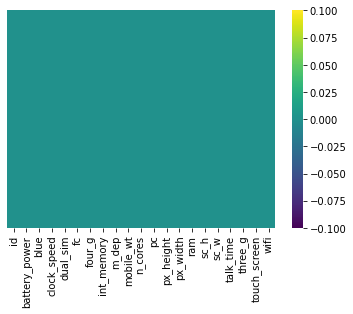

In [170]:
sns.heatmap(df1.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [171]:
df1.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [172]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1[['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]=ss.fit_transform(df1)

In [173]:
df1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-1.730320,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,...,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-1.726856,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,...,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,-1.723391,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,...,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,-1.719927,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,...,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,-1.716463,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,...,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


In [174]:
df1.drop(["id"],axis=1,inplace=True)

In [175]:
yp=svc.predict(df1)

In [176]:
cols=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

# Prediction on Test Dataset

In [177]:
prediction=pd.DataFrame(df1,columns=cols)

In [178]:
prediction["price_range"]=yp

In [179]:
prediction.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,...,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099,3
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,...,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099,3
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,...,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097,2
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,...,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099,3
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,...,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097,1


In [180]:
prediction["price_range"].value_counts().sort_values()

1    229
2    252
3    258
0    261
Name: price_range, dtype: int64

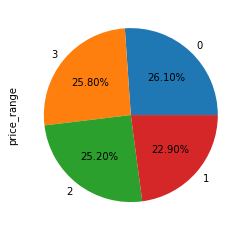

In [181]:
prediction["price_range"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

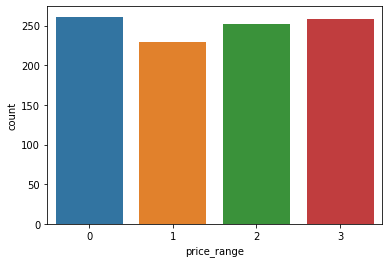

In [182]:
sns.countplot(prediction["price_range"])
plt.show()